In [1]:
import os
import numpy as np
from scipy import stats
import pandas as pd
import arviz as az 
pd.options.mode.chained_assignment = None
import math
from scipy.stats import norm
import xarray
import matplotlib.pyplot as plt

In [2]:
#this function is for transforming the plots into the right parameter space
#(for parameters that got phi_approx in the model code)
def transform1(dataset):
    variable = norm.pdf(dataset.mu_pr.values)
    dataset.mu_pr.values = variable
    return dataset

In [3]:
#change working directory to where netCDF files are stored
#note: code for running model uses az.from_pystan to convert pystan fit into xarray dataset
#and then xarray dataset is exported as a netcdf file
os.chdir('nc_files')

In [4]:
#extract fit from netcdf file
standard_basic_fit = az.from_netcdf('standard_basic_fit.nc')
uncued_basic_fit = az.from_netcdf('uncued_basic_fit.nc')
loss_basic_fit = az. from_netcdf('loss_basic_fit.nc')
outcome_basic_fit = az.from_netcdf('outcome_basic_fit.nc')
random_basic_fit = az.from_netcdf('random_basic_fit.nc')
reverse_basic_fit = az.from_netcdf('reverse_basic_fit.nc')

In [5]:
standard_basic_fit

Inference data with groups:
	> posterior
	> sample_stats

In [6]:
uncued_basic_fit

Inference data with groups:
	> posterior
	> sample_stats

array([[<AxesSubplot:title={'center':'mu_pr'}>,
        <AxesSubplot:title={'center':'mu_pr'}>]], dtype=object)

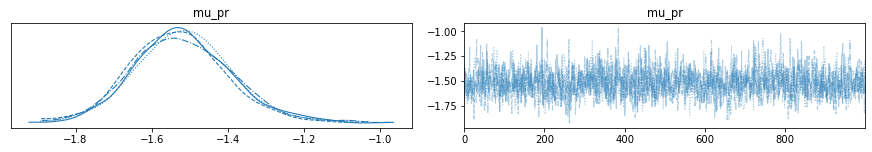

In [8]:
#extract posterior distribution for each group level parameter and plot them

#figures on left == posterior distribution for each of the chains --> should all overlap
#figures on right == trace plot for all four chains
#trace plot is a graph of the sampled parameter values as a function of the step in the chain 

# az.plot_trace(standard_basic_fit.posterior.mu_pr, coords = {'mu_pr_dim_0':[0,1,2,3]})
az.plot_trace(uncued_basic_fit.posterior.mu_pr, coords = {'mu_pr_dim_0':[0]})

In [9]:
sb_fit_mu = standard_basic_fit.posterior
sb_fit_sigma = standard_basic_fit.posterior

ub_fit_mu = uncued_basic_fit.posterior
# ub_fit_mu

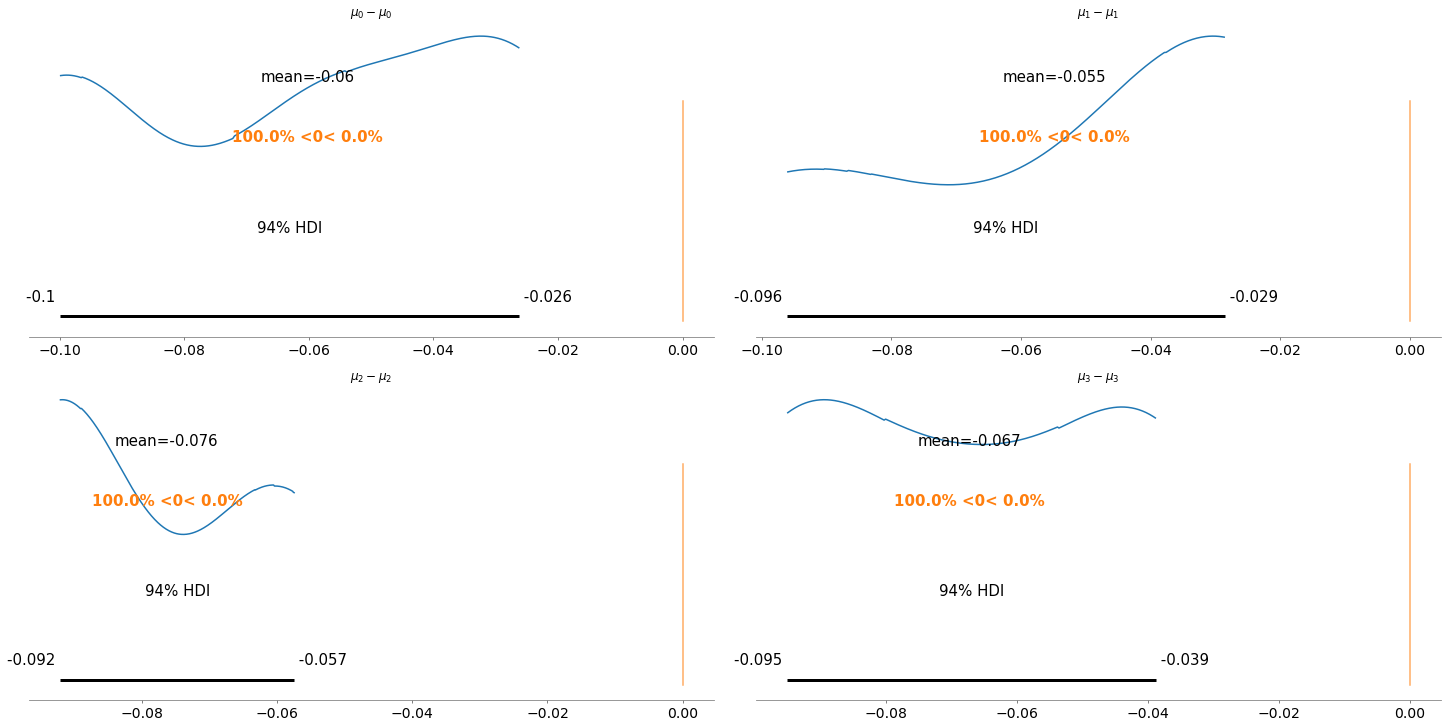

In [32]:
dist = stats.norm()

_, ax = plt.subplots(2, 2, figsize=(20, 10), constrained_layout=True)

comparisons = [(i, j) for i in range(4) for j in range(4) if j == i]
pos = [(k, l) for k in range(2) for l in range(2)]

for (i, j), (k, l) in zip(comparisons, pos):
    means_diff = sb_fit_mu['mu_pr'][:, i] - ub_fit_mu['mu_pr'][:, j]
#     d_cohen = (means_diff / np.sqrt((sb_fit_mu['sigma'][:, i]**2 + ub_fit_mu['sigma'][:, j]**2) / 2)).mean()
#     ps = dist.cdf(d_cohen/(2**0.5))
    az.plot_posterior(means_diff, ref_val=0, ax=ax[k, l])
    ax[k, l].set_title(f'$\mu_{i}-\mu_{j}$')
#     ax[k, l].plot(
#         0, label=f"Cohen's d = {d_cohen:.2f}\nProb sup = {ps:.2f}", alpha=0)
#     ax[k, l].legend();

In [95]:
# dist
# ax #numpy ndarray
# comparisons
# pos
# sb_fit_mu['mu_pr'] #4 arrays (each representing a chain)
# sb_fit_mu['mu_pr'][0] #the 1st array (representing the first chain)
# sb_fit_mu['mu_pr'][:, 0] #this is the first row of each array/chain
# sb_fit_mu['mu_pr'].values

# ub_fit_mu['mu_pr'].values
# means_diff = sb_fit_mu['mu_pr'][:, 1] - ub_fit_mu['mu_pr'][:, 1]
# means_diff

In [97]:
chain_1 = sb_fit_mu['mu_pr'][0]
chain_1 #the first chain, with 1000 draws
chain_1[:,0] #the first column of the first chain, representing mu_pr_0\

chain_2 = sb_fit_mu['mu_pr'][1]
chain_2
chain_2[:,0] #all the rows of the first column 

ub_chain_1 = ub_fit_mu['mu_pr'][0]
ub_chain_1 
ub_chain_1[:,0]

# dataset = pd.DataFrame({'mu_pr_0': chain_1[:, 0], 'mu_pr_1': chain_1[:, 1],'mu_pr_2': chain_1[:, 2],'mu_pr_3': chain_1[:, 3]})
# dataset

means_diff = chain_1[:,0] - ub_chain_1[:,0]
means_diff
# az.plot_posterior(means_diff, ref_val=0)
f'$\mu_{i}-\mu_{j}$'

'$\\mu_3-\\mu_3$'

In [99]:
name = "Eric"
age = 74
f"Hello, {name}. You are {age}."

<AxesSubplot:title={'center':'mu_pr'}>

In [153]:
sb_fit_mu['sigma'][0] #1st sigma chain
sb_fit_mu['sigma'][0][:,0]

<xarray.DataArray 'sigma' (draw: 1000)>
array([0.237268, 0.296936, 0.236245, ..., 0.173253, 0.172135, 0.161387])
Coordinates:
    chain        int64 0
  * draw         (draw) int64 0 1 2 3 4 5 6 7 ... 993 994 995 996 997 998 999
    sigma_dim_0  int64 0

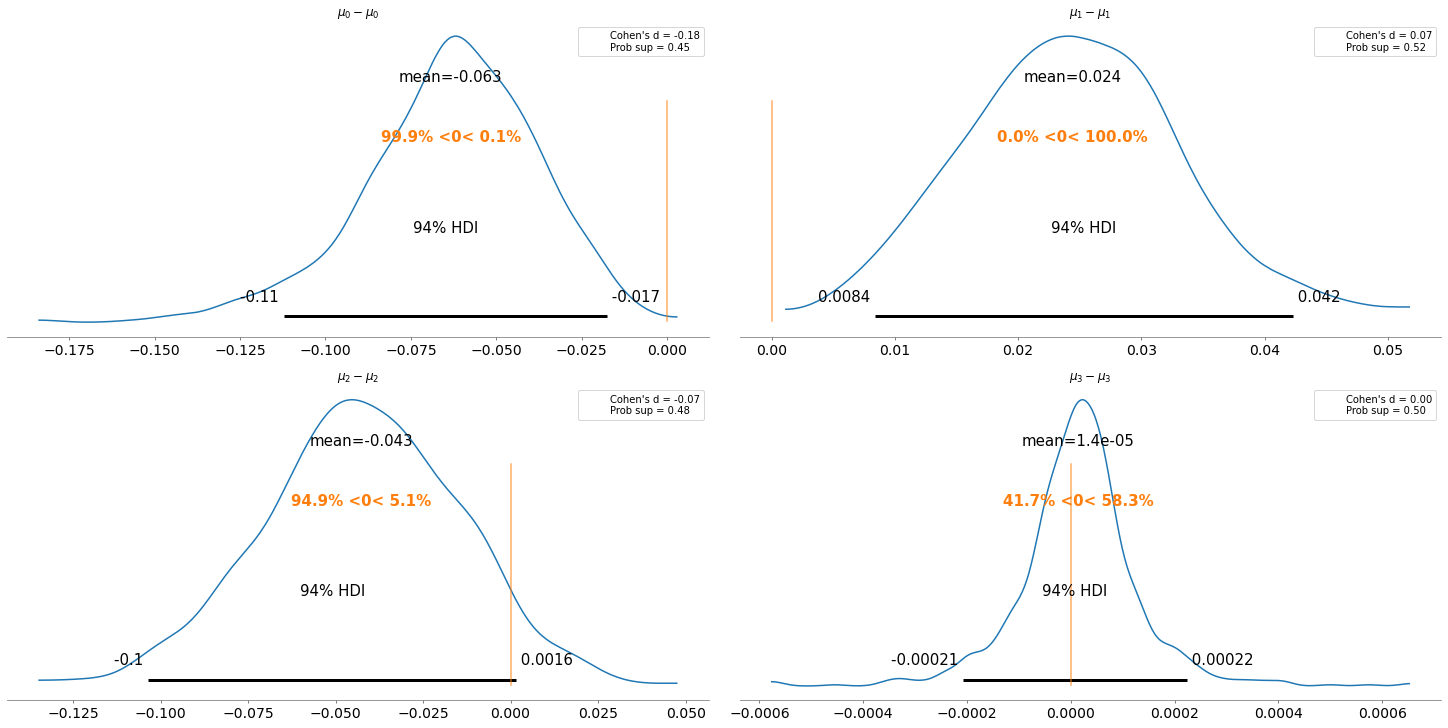

In [146]:
dist = stats.norm()

_, ax = plt.subplots(2, 2, figsize=(20, 10), constrained_layout=True)

comparisons = [(i, j) for i in range(4) for j in range(4) if j == i]
pos = [(k, l) for k in range(2) for l in range(2)]

for (i, j), (k, l) in zip(comparisons, pos):
    means_diff = sb_fit_mu['mu_pr'][0][:, i] - ub_fit_mu['mu_pr'][0][:, j] #means_diff holds the sample difference distribution values
    d_cohen = (means_diff / np.sqrt((sb_fit_mu['sigma'][0][:, i]**2 + ub_fit_mu['sigma'][0][:, j]**2) / 2)).mean() #d_cohen is an xarray.DataArray
    ps = dist.cdf(d_cohen/(2**0.5))
    az.plot_posterior(means_diff, ref_val=0, ax=ax[k, l]) #plots posteriors in 2D array of locations 
    #for example, mu_0 - mu_0 will be in the 0,0 box (top left)
    ax[k, l].set_title(f'$\mu_{i}-\mu_{j}$')
    ax[k, l].plot(
        0, label=f"Cohen's d = {d_cohen.values:.2f}\nProb sup = {ps:.2f}", alpha=0)
    ax[k, l].legend();

In [158]:
six = [(i, j) for i in range(6) for j in range(6)]
# six

In [159]:
def sample_diff(fit1, fit2):
    """Takes in fit1 and fit2 and outputs the sample difference distribution (fit1 - fit2) for the group parameters
    Also outputs Cohen's d, probability of superiority (Prob Sup)... and the distribution's mean, 94% HDI, and probability density to the left and right of 0"""
    #variables
    dist = stats.norm()
    _, ax = plt.subplots(2, 2, figsize=(20, 10), constrained_layout=True)
    comparisons = [(i, j) for i in range(4) for j in range(4) if j == i]
    pos = [(k, l) for k in range(2) for l in range(2)]

    #comparisons
    for (i, j), (k, l) in zip(comparisons, pos):
        means_diff = fit1.posterior['mu_pr'][0][:, i] - fit2.posterior['mu_pr'][0][:, j] #means_diff holds the sample difference distribution values
        d_cohen = (means_diff / np.sqrt((fit1.posterior['sigma'][0][:, i]**2 + fit2.posterior['sigma'][0][:, j]**2) / 2)).mean() #d_cohen is an xarray.DataArray
        ps = dist.cdf(d_cohen/(2**0.5))
        az.plot_posterior(means_diff, ref_val=0, ax=ax[k, l]) #plots posteriors in 2D array of locations: for example, mu_0 - mu_0 will be in the 0,0 box (top left)
        ax[k, l].set_title(f'$\mu_{i}-\mu_{j}$')
        ax[k, l].plot(0, label=f"Cohen's d = {d_cohen.values:.2f}\nProb sup = {ps:.2f}", alpha=0)
        ax[k, l].legend();

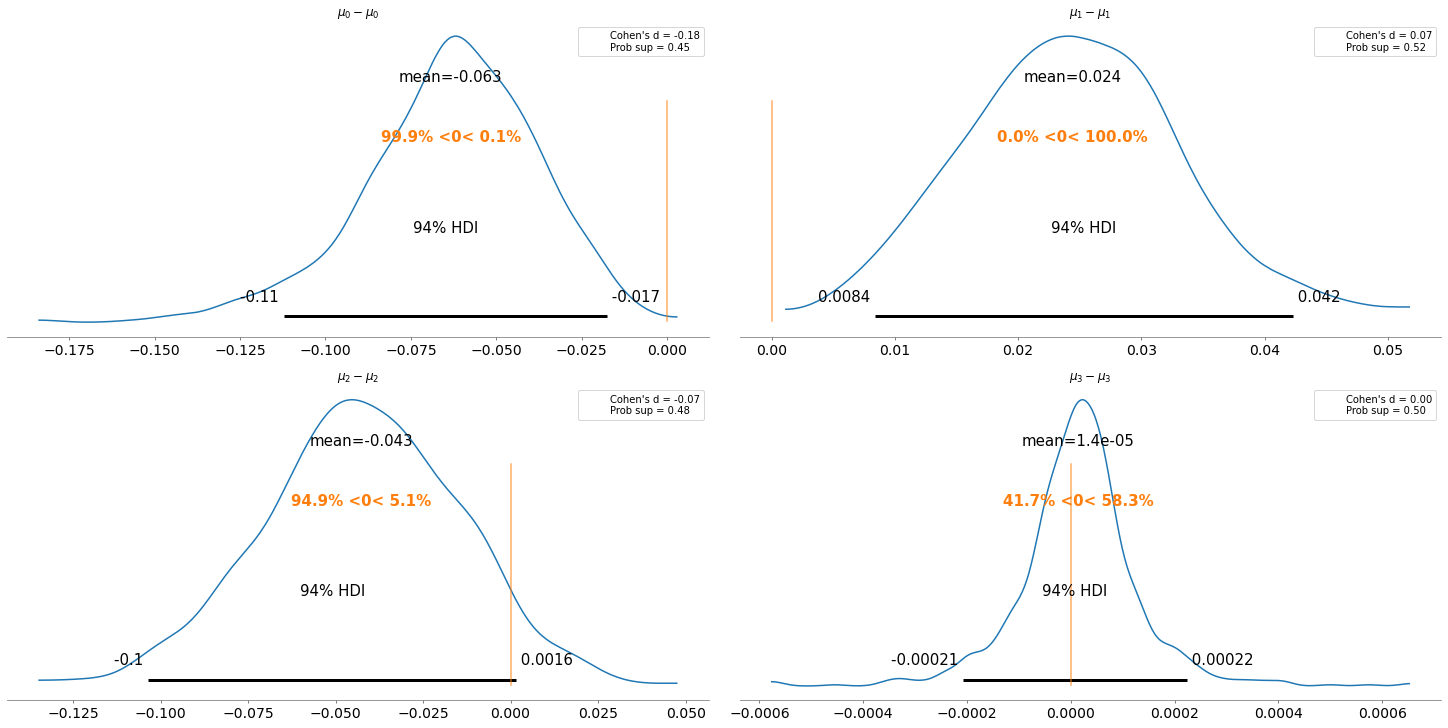

In [160]:
sample_diff(standard_basic_fit, uncued_basic_fit)

In [11]:
# dist = stats.norm()

# _, ax = plt.subplots(3, 2, figsize=(20, 12), constrained_layout=True)

# comparisons = [(i, j) for i in range(4) for j in range(i+1, 4)]
# pos = [(k, l) for k in range(3) for l in (0, 1)]

# for (i, j), (k, l) in zip(comparisons, pos):
#     means_diff = sb_fit_mu['mu_pr'][:, i] - sb_fit_mu['mu_pr'][:, j]
# #     d_cohen = (means_diff / np.sqrt((trace_groups_2['sigma'][:, i]**2 + trace_groups_2['sigma'][:, j]**2) / 2)).mean()
# #     ps = dist.cdf(d_cohen/(2**0.5))
#     az.plot_posterior(means_diff, ref_val=0, ax=ax[k, l])
#     ax[k, l].set_title(f'$\mu_{i}-\mu_{j}$')
# #     ax[k, l].plot(
# #         0, label=f"Cohen's d = {d_cohen:.2f}\nProb sup = {ps:.2f}", alpha=0)
# #     ax[k, l].legend();

In [12]:
# az.plot_trace(uncued_basic_fit.posterior.mu_pr, coords = {'mu_pr_dim_0':[0,1,2,3]})

In [13]:
#print summary statistics 
#xarray.set_options(display_max_rows=264)
summary_fit = az.summary(standard_basic_fit)
pd.set_option('display.max_rows', summary_fit.shape[0]+1)
# print(summary_fit) #prints all rows 

In [ ]:
# can convert to pandas dataframe (made no changes, runs fine) 
standard_basic_df = standard_basic_fit.to_dataframe()
# standard_basic_df.keys()
standard_basic_df

AttributeError: 'numpy.ndarray' object has no attribute 'set_title'

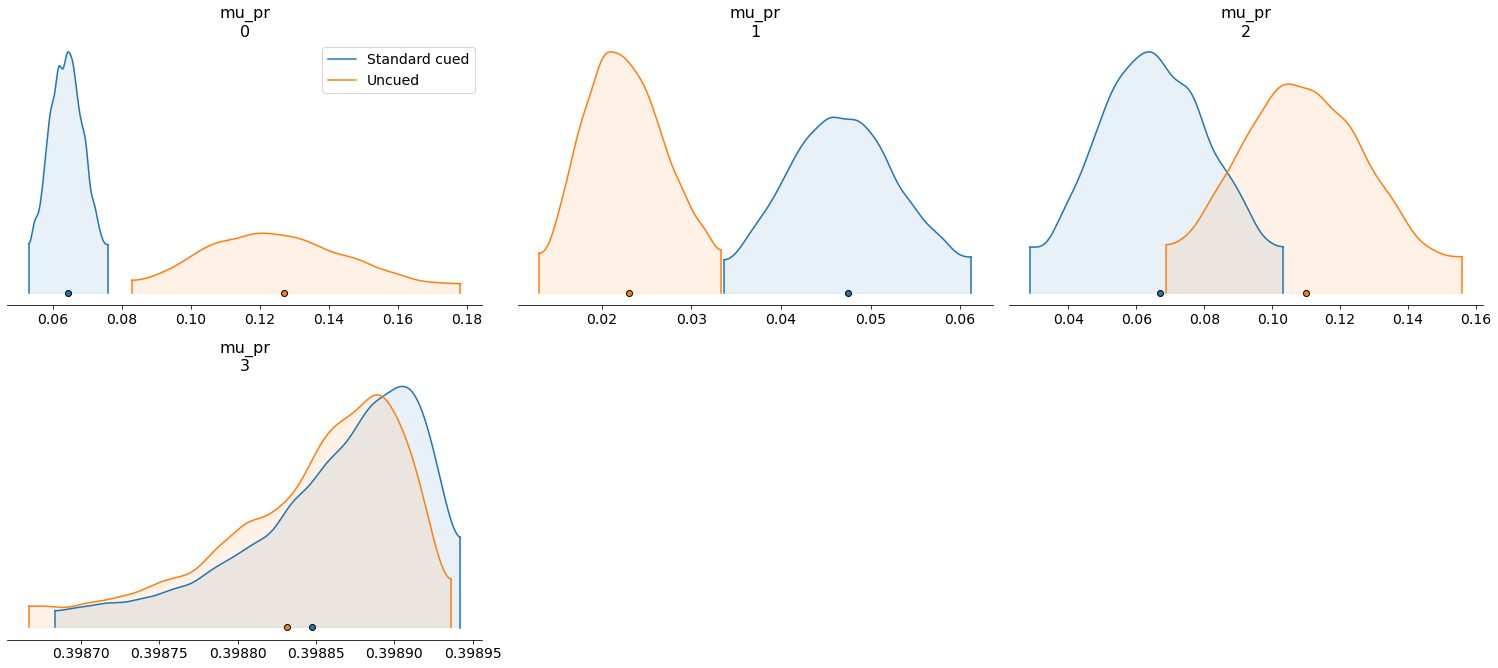

In [14]:
#plot the posterior distributions for group parameters, for diff groups 

#to get meaningful values for parameters that undergo phi_approx transformation in model code (beta, etapos, etaneg),
#include transform = transform1 as an argument
#this transform doesn't need to be applied for m 

ax = az.plot_density([standard_basic_fit,uncued_basic_fit], var_names = 'mu_pr', 
                data_labels = ['Standard cued', 'Uncued'],
                shade = 0.1, 
                hdi_prob = 0.95,
                transform = transform1)
params = ['Beta', 'Eta Positive', 'Eta Negative', 'm']

for i in range(len(ax)):
    ax[i].set_title(params[i], fontsize = 'xx-large')

In [ ]:
#plot the posterior distributions for group parameters, for diff groups 

#to get meaningful values for parameters that undergo phi_approx transformation in model code (beta, etapos, etaneg),
#include transform = transform1 as an argument
#this transform doesn't need to be applied for m 

ax = az.plot_density([uncued_basic_fit,loss_basic_fit,random_basic_fit], var_names = 'mu_pr', 
                data_labels = ['Uncued', 'Loss', 'Random'],
                shade = 0.1, 
               hdi_prob = 0.95)
params = ['Beta', 'Eta Positive', 'Eta Negative', 'm']

for i in range(len(ax)):
    ax[i].set_title(params[i], fontsize = 'xx-large')

In [ ]:
#plot the posterior distributions for group parameters, for diff groups 

#to get meaningful values for parameters that undergo phi_approx transformation in model code (beta, etapos, etaneg),
#include transform = transform1 as an argument
#this transform doesn't need to be applied for m 

ax = az.plot_density([standard_basic_fit,outcome_basic_fit,random_basic_fit,reverse_basic_fit,loss_basic_fit], 
                var_names = 'mu_pr', 
                data_labels = ['Standard', 'Outcome','Random','Reverse','Loss'],
                shade = 0.1, 
                hdi_prob = 0.95,
                    transform = transform1)
params = ['Beta', 'Eta Positive', 'Eta Negative', 'm']

for i in range(len(ax)):
    ax[i].set_title(params[i], fontsize = 'xx-large')

In [ ]:
az.plot_forest(standard_basic_fit)

In [ ]:
az.plot_violin(standard_basic_fit.posterior.beta)

In [ ]:
##WAIC

def softmax(x,beta):
    
    return np.exp(beta*x)/np.sum(np.exp(beta*x))

# calculate pointwise log-likelihood (ie for each datapoint)


#run chosen option through softmax equation, beta*V? with categorical logit PDF? not sure if I then take the maximum of this??

#then need to actually calculate WAIC

#point estimates and standard errors of the expected log pointwise predictive density 

#multiplied by -2